In [1]:
# packages
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import pandas as pd
import numpy as np
import pickle

import src.preprocessing as prep

In [2]:
# files and feature sets

file_genome = "../datasets/NC_000913.3.fasta"
file_purine_genes = "../datasets/pur_gene_screen.csv"

features_guide = ["guide_GC_content", "distance_start_codon", "homopolymers", "MFE_hybrid_full", "MFE_hybrid_seed", "MFE_homodimer_guide", "MFE_monomer_guide", 
               "off_target_90_100", "off_target_80_90", "off_target_70_80", "off_target_60_70"]

add_features = ["geneid", "OD02_edgeR.batch", "OD06_edgeR.batch", "OD1_edgeR.batch"]

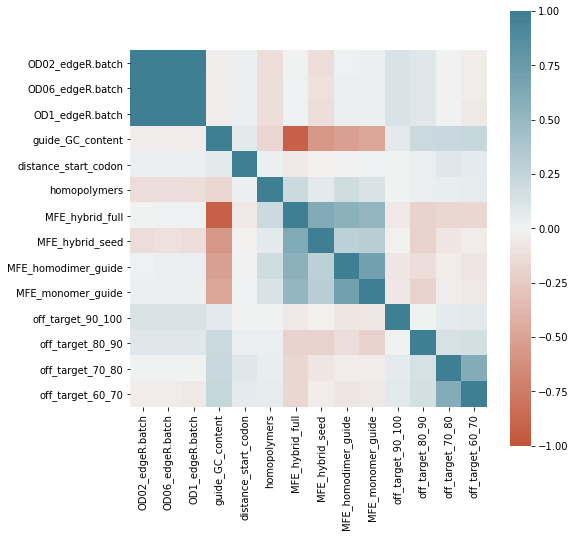

In [3]:
pd.set_option('mode.chained_assignment', None)

# load tabular data
data_purine_gene_all = pd.read_csv(file_purine_genes, header=0, sep="\t")
data_purine_gene_all = data_purine_gene_all.dropna().reset_index(drop=True)

data_purine_gene_all["sequence_40nt"] = prep.get_sequence(data_purine_gene_all,file_genome,upstream=4,downstream=16)

# one-hot encoding and kmer for sequence features
one_hot_encoding_ML_purine_gene = prep.one_hot_encode_ML(data_purine_gene_all)
one_hot_encoding_DL_purine_gene = prep.one_hot_encode_DL(data_purine_gene_all)
kmer_2_purine_gene = prep.get_kmer_table(data_purine_gene_all,2)
kmer_3_purine_gene = prep.get_kmer_table(data_purine_gene_all,3)
kmer_4_purine_gene = prep.get_kmer_table(data_purine_gene_all,4)
kmer_purine_gene = pd.concat([kmer_2_purine_gene,kmer_3_purine_gene,kmer_4_purine_gene],axis=1)

# filter out features
data_purine_gene = data_purine_gene_all[add_features + features_guide]

# plot correlation
plt.rcParams['figure.figsize'] = [8, 8]
sns.heatmap(data_purine_gene.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)

pickle.dump(data_purine_gene, open('../datasets/data_purine_gene.pickle', 'wb'))
pickle.dump(one_hot_encoding_ML_purine_gene, open('../datasets/one_hot_encoding_ML_purine_gene.pickle', 'wb'))
pickle.dump(one_hot_encoding_DL_purine_gene, open('../datasets/one_hot_encoding_DL_purine_gene.pickle', 'wb'))
pickle.dump(kmer_purine_gene, open('../datasets/kmer_purine_gene.pickle', 'wb'))